In [28]:
# Import the dependencies.
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
from config import weather_api_key
import time

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city

'kavaratti'

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        # If an error is experienced, skip the city.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | henties bay
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | nome
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | vao
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | kuryk
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | lobito
Processing Record 16 of Set 1 | pasni
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | sao gabriel da cachoeira
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | xichang
Processing Record 21 of Set 1 | kitami
Processing Record 22 of Set 1 | houma
Processing Recor

Processing Record 38 of Set 4 | nanakuli
Processing Record 39 of Set 4 | huntington
Processing Record 40 of Set 4 | batagay-alyta
Processing Record 41 of Set 4 | muli
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | dumas
Processing Record 44 of Set 4 | balaipungut
Processing Record 45 of Set 4 | beohari
Processing Record 46 of Set 4 | gillette
Processing Record 47 of Set 4 | carberry
Processing Record 48 of Set 4 | baghdad
Processing Record 49 of Set 4 | rawson
Processing Record 50 of Set 4 | yerofey pavlovich
Processing Record 1 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 5 | belmonte
Processing Record 3 of Set 5 | oranjemund
Processing Record 4 of Set 5 | lasa
Processing Record 5 of Set 5 | marcona
City not found. Skipping...
Processing Record 6 of Set 5 | manchar
Processing Record 7 of Set 5 | guanambi
Processing Record 8 of Set 5 | nongan
Processing Record 9 of Set 5 | khatanga
Processing Record 10 of Set 5

Processing Record 27 of Set 8 | cayenne
Processing Record 28 of Set 8 | islampur
Processing Record 29 of Set 8 | sarankhola
Processing Record 30 of Set 8 | hauterive
Processing Record 31 of Set 8 | shenjiamen
Processing Record 32 of Set 8 | hamilton
Processing Record 33 of Set 8 | luang prabang
Processing Record 34 of Set 8 | amderma
City not found. Skipping...
Processing Record 35 of Set 8 | kuche
City not found. Skipping...
Processing Record 36 of Set 8 | kavieng
Processing Record 37 of Set 8 | palu
Processing Record 38 of Set 8 | tautira
Processing Record 39 of Set 8 | ohrid
Processing Record 40 of Set 8 | lillooet
Processing Record 41 of Set 8 | temerloh
Processing Record 42 of Set 8 | bandarbeyla
Processing Record 43 of Set 8 | lively
Processing Record 44 of Set 8 | pacific grove
Processing Record 45 of Set 8 | leningradskiy
Processing Record 46 of Set 8 | ucluelet
Processing Record 47 of Set 8 | uige
Processing Record 48 of Set 8 | gornopravdinsk
Processing Record 49 of Set 8 | c

Processing Record 12 of Set 12 | shenkursk
Processing Record 13 of Set 12 | shitkino
Processing Record 14 of Set 12 | kloulklubed
Processing Record 15 of Set 12 | yar-sale
Processing Record 16 of Set 12 | ust-tsilma
Processing Record 17 of Set 12 | boda
Processing Record 18 of Set 12 | sao felix do xingu
Processing Record 19 of Set 12 | seydi
Processing Record 20 of Set 12 | segezha
Processing Record 21 of Set 12 | amudat
Processing Record 22 of Set 12 | deh rawud
City not found. Skipping...
Processing Record 23 of Set 12 | capreol
Processing Record 24 of Set 12 | gamba
Processing Record 25 of Set 12 | upanema
Processing Record 26 of Set 12 | salvador
Processing Record 27 of Set 12 | usinsk
Processing Record 28 of Set 12 | grand gaube
Processing Record 29 of Set 12 | pahrump
Processing Record 30 of Set 12 | arica
Processing Record 31 of Set 12 | valdez
Processing Record 32 of Set 12 | poso
Processing Record 33 of Set 12 | portland
Processing Record 34 of Set 12 | billings
Processing Re

In [19]:
city_data

[{'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 39.47,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 8.28,
  'Country': 'NZ',
  'Date': '2021-08-06 21:37:53'},
 {'City': 'Norman Wells',
  'Lat': 65.282,
  'Lng': -126.8329,
  'Max Temp': 55.44,
  'Humidity': 94,
  'Cloudiness': 90,
  'Wind Speed': 11.5,
  'Country': 'CA',
  'Date': '2021-08-06 21:37:53'},
 {'City': 'Henties Bay',
  'Lat': -22.116,
  'Lng': 14.2845,
  'Max Temp': 54.86,
  'Humidity': 82,
  'Cloudiness': 2,
  'Wind Speed': 8.08,
  'Country': 'NA',
  'Date': '2021-08-06 21:37:54'},
 {'City': 'Sitka',
  'Lat': 57.0531,
  'Lng': -135.33,
  'Max Temp': 60.69,
  'Humidity': 77,
  'Cloudiness': 90,
  'Wind Speed': 14.97,
  'Country': 'US',
  'Date': '2021-08-06 21:33:09'},
 {'City': 'Nome',
  'Lat': 64.5011,
  'Lng': -165.4064,
  'Max Temp': 53.17,
  'Humidity': 93,
  'Cloudiness': 90,
  'Wind Speed': 9.22,
  'Country': 'US',
  'Date': '2021-08-06 21:33:15'},
 {'City': 'Yellowknife',
  'Lat': 6

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,39.47,95,100,8.28,NZ,2021-08-06 21:37:53
1,Norman Wells,65.2820,-126.8329,55.44,94,90,11.50,CA,2021-08-06 21:37:53
2,Henties Bay,-22.1160,14.2845,54.86,82,2,8.08,NA,2021-08-06 21:37:54
3,Sitka,57.0531,-135.3300,60.69,77,90,14.97,US,2021-08-06 21:33:09
4,Nome,64.5011,-165.4064,53.17,93,90,9.22,US,2021-08-06 21:33:15
5,Yellowknife,62.4560,-114.3525,73.92,40,75,9.22,CA,2021-08-06 21:37:54
6,Hobart,-42.8794,147.3294,52.05,71,75,5.01,AU,2021-08-06 21:37:55
7,Torbay,47.6666,-52.7314,77.77,75,20,21.85,CA,2021-08-06 21:35:32
8,Vao,-22.6667,167.4833,67.69,61,66,12.10,NC,2021-08-06 21:37:55
9,Port Alfred,-33.5906,26.8910,57.70,80,31,4.47,ZA,2021-08-06 21:37:56


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-08-06 21:37:53,-46.1927,168.8643,39.47,95,100,8.28
1,Norman Wells,CA,2021-08-06 21:37:53,65.2820,-126.8329,55.44,94,90,11.50
2,Henties Bay,NA,2021-08-06 21:37:54,-22.1160,14.2845,54.86,82,2,8.08
3,Sitka,US,2021-08-06 21:33:09,57.0531,-135.3300,60.69,77,90,14.97
4,Nome,US,2021-08-06 21:33:15,64.5011,-165.4064,53.17,93,90,9.22
5,Yellowknife,CA,2021-08-06 21:37:54,62.4560,-114.3525,73.92,40,75,9.22
6,Hobart,AU,2021-08-06 21:37:55,-42.8794,147.3294,52.05,71,75,5.01
7,Torbay,CA,2021-08-06 21:35:32,47.6666,-52.7314,77.77,75,20,21.85
8,Vao,NC,2021-08-06 21:37:55,-22.6667,167.4833,67.69,61,66,12.10
9,Port Alfred,ZA,2021-08-06 21:37:56,-33.5906,26.8910,57.70,80,31,4.47


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

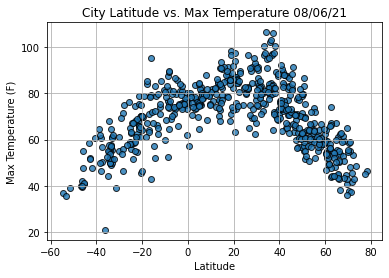

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

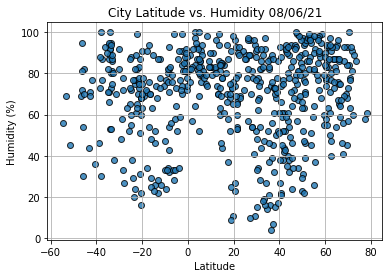

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

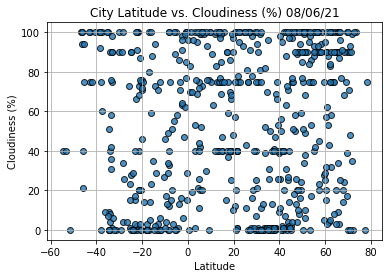

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

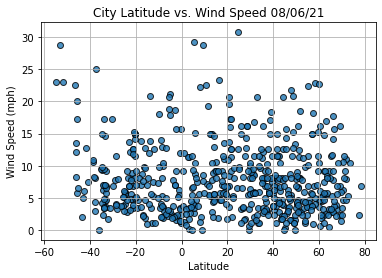

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()